<a href="https://colab.research.google.com/github/Rogerio-mack/Research-Literature-Review-APIs/blob/main/search_GoogleScholar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Literature review from [Google-Scholar](https://serpapi.com/google-scholar-api)

**`keyword`** = 'supply chain resilience'

<br>


[Try Playground](https://serpapi.com/playground?engine=google_scholar&q=Coffee&hl=en)





In [ ]:
#@markdown Setups
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import requests  # Import the requests library
import json
import pprint # nicely json print
import time
import re

In [ ]:
#@markdown Populate local Database
# url = 'https://serpapi.com/search.json?engine=google_scholar&q=supply+chain+resilience&as_ylo=2012&as_yhi=2022&api_key=e5b17eacc0f2e1b34569e4fc3f01163f97b3cbb3802d95a5dc5f7dc38e8fa0ce'

apikey = '&api_key=YOUR-API-KEY'

keyword = 'supply+chain+resiliencee&as_ylo=2012&as_yhi=2022'
max_search = 1000 # max total search
if max_search > 1000:
  print('ERROR. Max search is 1000')
limit = 100 # each search
print_json = False

apiquery = '&q=' + keyword

apischolar = 'https://serpapi.com/search.json?engine=google_scholar' 
apicount = '&number='
apistart = '&start='

url = apischolar + apiquery + apikey + apicount + str(1) + apistart + str(0)
res = requests.get(url, headers={'Accept':'application/json'}) 

if res.status_code ==200:
    payload = res.json()
    total = int(payload['search_information']['total_results'])
    if (total > 0):
      print(f"Total of keyword search results: {total}")
      max = min(max_search,total)
      print()
    else:
      print(f"No results for  keyword search: {keyword}")
      print()
      max = 0 # scape loop for search results
else:
    print(f"Request returned {res.status_code} : '{res.reason}'") 
    max = 0 # scape loop for search results

all_items = []

for offset in range(0, max, limit):
    
  url = apischolar + apiquery + apikey + apicount + str(limit) + apistart + str(offset)  
  res = requests.get(url)  # Make a GET request to the URL
 
  print('running...' , offset)    
  print(url)  

  payload = res.json()  # Parse `response.text` into JSON

  if res.status_code != 200 or print_json == True: 
    print(f"Request returned {res.status_code} : '{res.reason}'")
    pp = pprint.PrettyPrinter(indent=1)
    pp.pprint(payload)
    # NOTE: Could use print(response.json()) but this wouldn't be formatted nicely

  # print(len(payload['data']))
  all_items.append(payload)   

  if (offset+1)%(limit * 10) == 0: # wait each 10 searchs to avoid forbiden access (443)
      print('Waiting...')
      time.sleep(5) # Sleep for 5 seconds
  
df = pd.json_normalize(all_items[0], record_path =['organic_results']) 

for i in range(1,len(all_items)):
  df = pd.concat([df, pd.json_normalize(all_items[i], record_path =['organic_results'])])

df = df.reset_index(drop=True)

df = df[['position', 'title', 'snippet', 'publication_info.summary', 'publication_info.authors',
       'inline_links.serpapi_cite_link', 'inline_links.cited_by.total']]

first_authors = []
all_authors = []

for list_authors_rec in df['publication_info.authors']:
    
    list_authors = []
    
    if type(list_authors_rec) != type([]):
        list_authors.append('Unknown')
    elif len(list_authors_rec) < 1:
        list_authors.append('Unknown')    
    else:    
        for author in list_authors_rec:
            list_authors.append(author['name'])
            # print(list_authors)
   
    if len(list_authors) > 1:
        first_authors.append(list_authors[0] + ', et. al.')
    else:
        first_authors.append(list_authors[0])
        
    authors = ''
    for author in list_authors:
        authors = authors + author + ', '
        
    authors = authors[0:-2] # elimina última ', '
    
    all_authors.append(authors)
    
df['first_author'] = first_authors
df['authors'] = all_authors   

year = []

for summary in df['publication_info.summary']:
  list_years = re.findall(r'(\d{4})', summary)
  if len(list_years) >= 1:
    year.append(int(list_years[-1])) # Last year in summary
  else:
    year.append(1900)

df['year'] = year

scholar = df.copy()

df = pd.DataFrame()

df['title'] = scholar['title']
df['year'] = scholar['year']
df['first_author'] = scholar.first_author
df['authors'] = scholar.authors
df['citationCount'] = scholar['inline_links.cited_by.total']
df['influentialCitationCount'] = 0 # none for scopus
df['abstract'] = scholar.snippet

print('SUMMARY SEARCH')
print(100*'-')
print(' Base: ', url)
print(' keyword: ', keyword)
print(' Fields: ',scholar.columns)
print()
print('RESULTS')
print(100*'-')

pd.options.display.max_columns = 999
pd.options.display.max_colwidth = 100

display(df[['title', 'year', 'first_author', 'authors', 'citationCount', 'influentialCitationCount']].head())


SUMMARY SEARCH
----------------------------------------------------------------------------------------------------
 Base:  https://serpapi.com/search.json?engine=google_scholar&q=supply+chain+resiliencee&as_ylo=2012&as_yhi=2022&api_key=e5b17eacc0f2e1b34569e4fc3f01163f97b3cbb3802d95a5dc5f7dc38e8fa0ce&number=100&start=900
 keyword:  supply+chain+resiliencee&as_ylo=2012&as_yhi=2022
 Fields:  Index(['position', 'title', 'snippet', 'publication_info.summary',
       'publication_info.authors', 'inline_links.serpapi_cite_link',
       'inline_links.cited_by.total', 'first_author', 'authors', 'year'],
      dtype='object')

RESULTS
----------------------------------------------------------------------------------------------------


,title,year,first_author,authors,citationCount,influentialCitationCount
0,Two perspectives on supply chain resilience,2021,"A Wieland, et. al.","A Wieland, CF Durach",36,0
1,The role of collaboration in supply chain resilience,2015,K Scholten,K Scholten,476,0
2,The evolution of resilience in supply chain management: a retrospective on ensuring supply chain...,2019,"KL Croxton, et. al.","KL Croxton, J Fiksel",186,0
3,Ensuring supply chain resilience: development and implementation of an assessment tool,2013,"KL Croxton, et. al.","KL Croxton, J Fiksel",692,0
4,Supply chain resilience: role of complexities and strategies,2015,"A Gunasekaran, et. al.","A Gunasekaran, N Subramanian",184,0


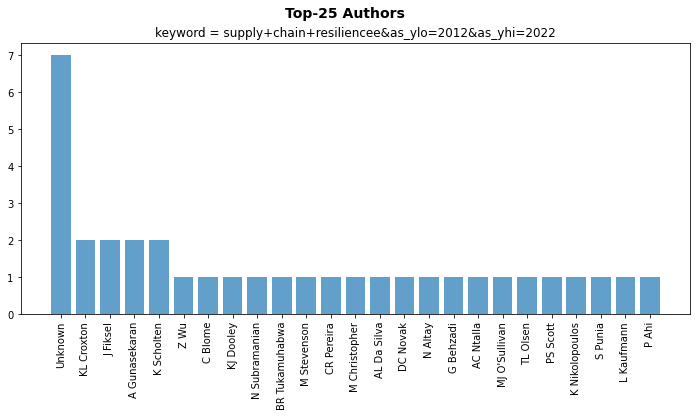

In [ ]:
#@markdown  
import matplotlib.pyplot as plt
%matplotlib inline

authors_dic = {}
for authors in df['authors']:
  authors_list = authors.split(',')
  for author in authors_list:
    a = author.lstrip().rstrip() # remove white spaces before and after
    if a not in authors_dic.keys():    
      authors_dic[a] = 1                    
    else:                                  
      authors_dic[a] =  authors_dic[a] + 1

# print(list(authors_dic.items())[:10])   

df_authors_count = pd.DataFrame(authors_dic.items(),  columns=['author', 'count']).sort_values('count',ascending=False)
df_authors_count = df_authors_count.sort_values('count',ascending=False)
df_authors_count = df_authors_count.reset_index(drop=True)
# df_authors_count.head()

df_authors_count = df_authors_count[df_authors_count.author != ''] # clear articles without authors!

df_authors_count = df_authors_count.head(25)

plt.figure(figsize=(12,5))
plt.bar(x=df_authors_count['author'], height=df_authors_count['count'],alpha=0.7)

plt.suptitle('Top-25 Authors', fontsize=14, weight='bold')
plt.title('keyword = ' + keyword, fontsize=12)
plt.xticks(rotation=90)
plt.show()



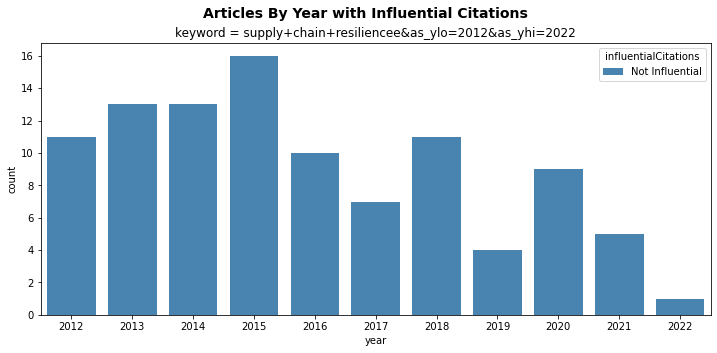

In [ ]:
#@markdown  
import seaborn as sns

df_2000 = df[ df.year > 2000 ].copy()
df_2000['influentialCitations'] = df.influentialCitationCount > 0
df_2000['influentialCitations'] = df_2000['influentialCitations'].replace(True, 'Influential')
df_2000['influentialCitations'] = df_2000['influentialCitations'].replace(False, 'Not Influential')

plt.figure(figsize=(12,5))
sns.countplot(x='year', hue='influentialCitations', data=df_2000, palette=sns.color_palette("Blues_r",2))

plt.suptitle('Articles By Year with Influential Citations', fontsize=14, weight='bold')
plt.title('keyword = ' + keyword, fontsize=12)
plt.show()


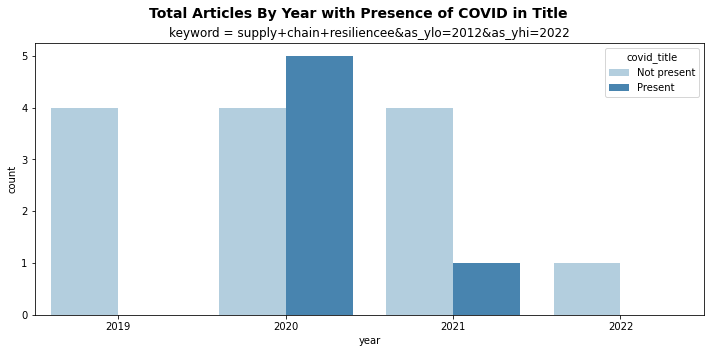

In [ ]:
#@markdown  
df_covid = df_2000[ (df_2000.year >= 2019) ].copy() 

df_covid['covid_title'] = df_covid['title'].str.lower().str.count('covid') > 0
df_covid['covid_title'] = df_covid['covid_title'].replace(True, 'Present')
df_covid['covid_title'] = df_covid['covid_title'].replace(False, 'Not present')

plt.figure(figsize=(12,5))
sns.countplot(x='year', hue='covid_title', data=df_covid, palette=sns.color_palette("Blues",2))

plt.suptitle('Total Articles By Year with Presence of COVID in Title', fontsize=14, weight='bold')
plt.title('keyword = ' + keyword, fontsize=12)
plt.show()

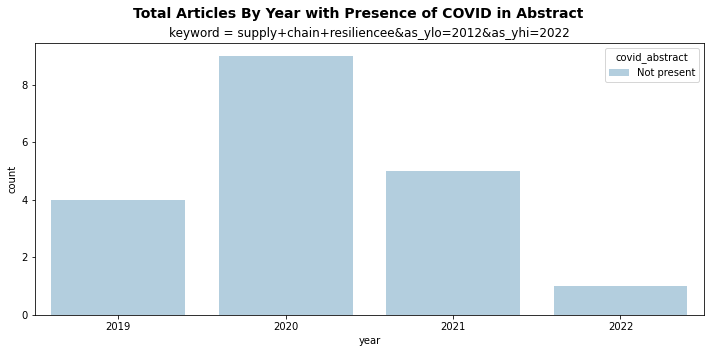

In [ ]:
#@markdown  
df_covid_abstract = df_2000[ (df_2000.year >= 2019) ].copy() 

df_covid_abstract['covid_abstract'] = df_covid_abstract['abstract'].str.lower().str.count('covid') > 0
df_covid_abstract['covid_abstract'] = df_covid_abstract['covid_abstract'].replace(True, 'Present')
df_covid_abstract['covid_abstract'] = df_covid_abstract['covid_abstract'].replace(False, 'Not present')

plt.figure(figsize=(12,5))
sns.countplot(x='year', hue='covid_abstract', data=df_covid_abstract, palette=sns.color_palette("Blues",2))

plt.suptitle('Total Articles By Year with Presence of COVID in Abstract', fontsize=14, weight='bold')
plt.title('keyword = ' + keyword, fontsize=12)
plt.show()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.




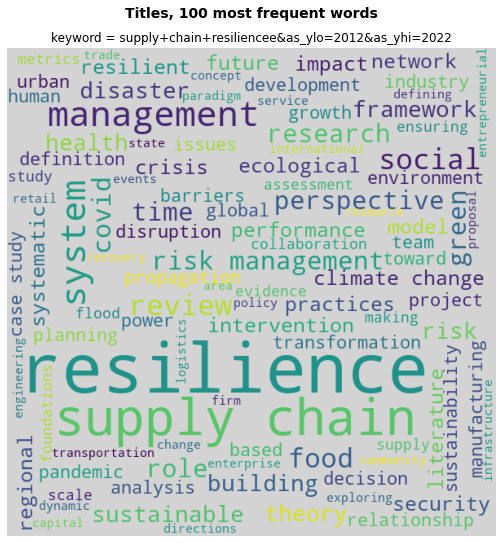

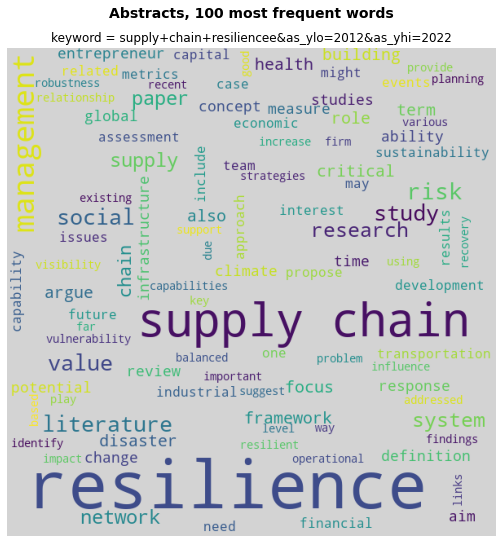

In [ ]:
#@markdown 
import matplotlib.pyplot as plt
%matplotlib inline

from wordcloud import WordCloud, STOPWORDS
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

def word_cloud(df,df_column,plot_title='Word Cloud',limit=100):

  stopwords_set = set( stopwords.words('english'))

  texto_string = ''
  for texto in df[df_column]:
    texto_string = texto_string + ' ' + texto.lower()  

  wordcloud = WordCloud(width = 600, height = 600,
          background_color ='lightgrey',
          max_words=limit,
          stopwords = stopwords_set,
          min_font_size = 10).generate(texto_string)

  print('\n')
  plt.figure(figsize = (7, 7), facecolor = None)
  plt.suptitle(plot_title, fontsize=14, weight='bold', y=1.05)
  plt.title('keyword = ' + keyword, fontsize=12)
  plt.imshow(wordcloud)
  plt.axis("off")
  plt.tight_layout(pad = 0)

  plt.show()

  return

word_cloud(df,'title',plot_title='Titles, 100 most frequent words')
word_cloud(df,'abstract',plot_title='Abstracts, 100 most frequent words')

